# Imports

In [121]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import pickle

import psycopg2

# Read in data

In [2]:
with open("../database/secrets", "r") as file:
    secrets = [i.strip('\n') for i in file.readlines()]


def conn_curs():
    """
    makes a connection to the database dont worry these are dummy keys
    """

    connection = psycopg2.connect(dbname=secrets[4], user=secrets[4],
                                  password=secrets[5], host=secrets[6])
    cursor = connection.cursor()
    return connection, cursor

In [3]:
conn, curs = conn_curs()

In [4]:
df = pd.read_sql("SELECT * FROM posts", conn)

# Inspect

In [5]:
df.head()

,id,text,subreddit
0,1,Using This Subreddit # Rules\n1. [Be excellent...,MovieSuggestions
1,2,Looking for a movie where a mother/father go i...,MovieSuggestions
2,3,The Abyss \n\nHi Everyone. I had originally p...,MovieSuggestions
3,4,"Good plot twist Hi all,\n\nAny suggestions for...",MovieSuggestions
4,5,featuring characters who have interesting reas...,MovieSuggestions


In [6]:
df.shape

(8735, 3)

In [7]:
df.drop('id', axis=1, inplace=True)

In [9]:
df.subreddit.value_counts()

KarmaCourt              300
AskMen                  300
nosleep                 300
learnpython             300
explainlikeimfive       300
TalesFromRetail         300
whowouldwin             300
bestof                  300
RedditWritesSeinfeld    300
askscience              300
books                   300
philosophy              300
bestoflegaladvice       300
TellMeAFact             300
HailCorporate           300
learnSQL                300
patientgamers           300
worldnews               300
britishproblems         300
AmItheAsshole           300
tifu                    300
pcmasterrace            300
boringdystopia          300
WritingPrompts          300
talesfromtechsupport    300
AskWomen                300
MovieSuggestions        300
dating_advice           300
OutOfTheLoop            185
ProRevenge              129
newreddits               21
Name: subreddit, dtype: int64

# Model

In [10]:
vect = TfidfVectorizer(max_df=.95, min_df=80)

In [11]:
vect.fit(df.text)

TfidfVectorizer(max_df=0.95, min_df=80)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.subreddit, test_size=0.33, random_state=42)

In [13]:
train_df = pd.DataFrame(vect.transform(X_train).todense(), columns=vect.get_feature_names())
train_df.head()

,000,10,100,11,12,13,14,15,16,18,...,you,youll,young,younger,your,youre,yourself,youtube,youve,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.425472,0.0,0.0,0.0,0.18710,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.079545,0.0,0.0,0.0,0.05247,0.0,0.095391,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01595,0.0,0.0,...,0.003449,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0


In [14]:
val_df = pd.DataFrame(vect.transform(X_test).todense(), columns=vect.get_feature_names())
val_df.head()

,000,10,100,11,12,13,14,15,16,18,...,you,youll,young,younger,your,youre,yourself,youtube,youve,zero
0,0.0,0.059056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.047105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.037410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
log = LogisticRegression(random_state=42,n_jobs=-1)
log.fit(train_df, y_train);

In [17]:
print(f"Train accuracy: {log.score(train_df, y_train)}")
print(f"Val accuracy: {log.score(val_df, y_test)}")

Train accuracy: 0.8964456596035544
Val accuracy: 0.7929240374609782


In [20]:
with open("../models/base_log", "wb") as file:
    pickle.dump(log, file)

In [22]:
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(train_df, y_train);

In [23]:
print(f"Train accuracy: {forest.score(train_df, y_train)}")
print(f"Val accuracy: {forest.score(val_df, y_test)}")

Train accuracy: 0.9958988380041012
Val accuracy: 0.7544224765868887


In [25]:
mnb = MultinomialNB()
mnb.fit(train_df, y_train);

In [26]:
print(f"Train accuracy: {mnb.score(train_df, y_train)}")
print(f"Val accuracy: {mnb.score(val_df, y_test)}")

Train accuracy: 0.7995557074504442
Val accuracy: 0.6881720430107527


In [28]:
knc = KNeighborsClassifier(n_jobs=-1)
knc.fit(train_df, y_train);

In [29]:
print(f"Train accuracy: {knc.score(train_df, y_train)}")
print(f"Val accuracy: {knc.score(val_df, y_test)}")

Train accuracy: 0.4388243335611757
Val accuracy: 0.2941380506416927


In [31]:
svc = SVC()
svc.fit(train_df, y_train);

In [32]:
print(f"Train accuracy: {svc.score(train_df, y_train)}")
print(f"Val accuracy: {svc.score(val_df, y_test)}")

Train accuracy: 0.9817156527682843
Val accuracy: 0.7814776274713839


In [35]:
sgd = SGDClassifier(n_jobs=-1)
sgd.fit(train_df, y_train);

In [36]:
print(f"Train accuracy: {sgd.score(train_df, y_train)}")
print(f"Val accuracy: {sgd.score(val_df, y_test)}")

Train accuracy: 0.9572795625427204
Val accuracy: 0.7998612556364898


# Consider SVM and SGD

In [122]:
decom = PCA(3).fit(train_df)
pca = decom.transform(train_df)

In [123]:
pca_df = pd.DataFrame(pca)
print(pca_df.isnull().sum())
print(pca_df.shape, y_train.shape)
pca_df.head()

0    0
1    0
2    0
dtype: int64
(5852, 3) (5852,)


,0,1,2
0,-0.125168,-0.072854,-0.183143
1,0.193806,0.002680,-0.054788
2,0.536428,0.125051,0.109768
3,-0.439818,0.592245,0.066153
4,-0.248776,-0.068094,-0.044435


In [124]:
plot_df = pd.concat([pca_df.reset_index(), pd.DataFrame(y_train).reset_index()], axis=1)

In [125]:
plot_df.head()

,index,0,1,2,index,subreddit
0,0,-0.125168,-0.072854,-0.183143,2685,WritingPrompts
1,1,0.193806,0.002680,-0.054788,4844,AskMen
2,2,0.536428,0.125051,0.109768,3334,nosleep
3,3,-0.439818,0.592245,0.066153,4275,TellMeAFact
4,4,-0.248776,-0.068094,-0.044435,387,whowouldwin


In [126]:
plot_df.drop('index', axis=1, inplace=True)

In [135]:
groups = plot_df.groupby('subreddit')

# Plot
fig, ax = plt.subplots()

fig.set_size_inches(30, 15)
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group[0], group[1],group[2] marker='o', linestyle='', ms=12, label=name)

x = decom.transform(vect.transform(["Am i the asshole"]).todense())[0]
ax.plot(x[0],x[1],x[2],marker="o", linestyle="", ms=12, label="Your Post", c="black")

ax.legend()

plt.show()

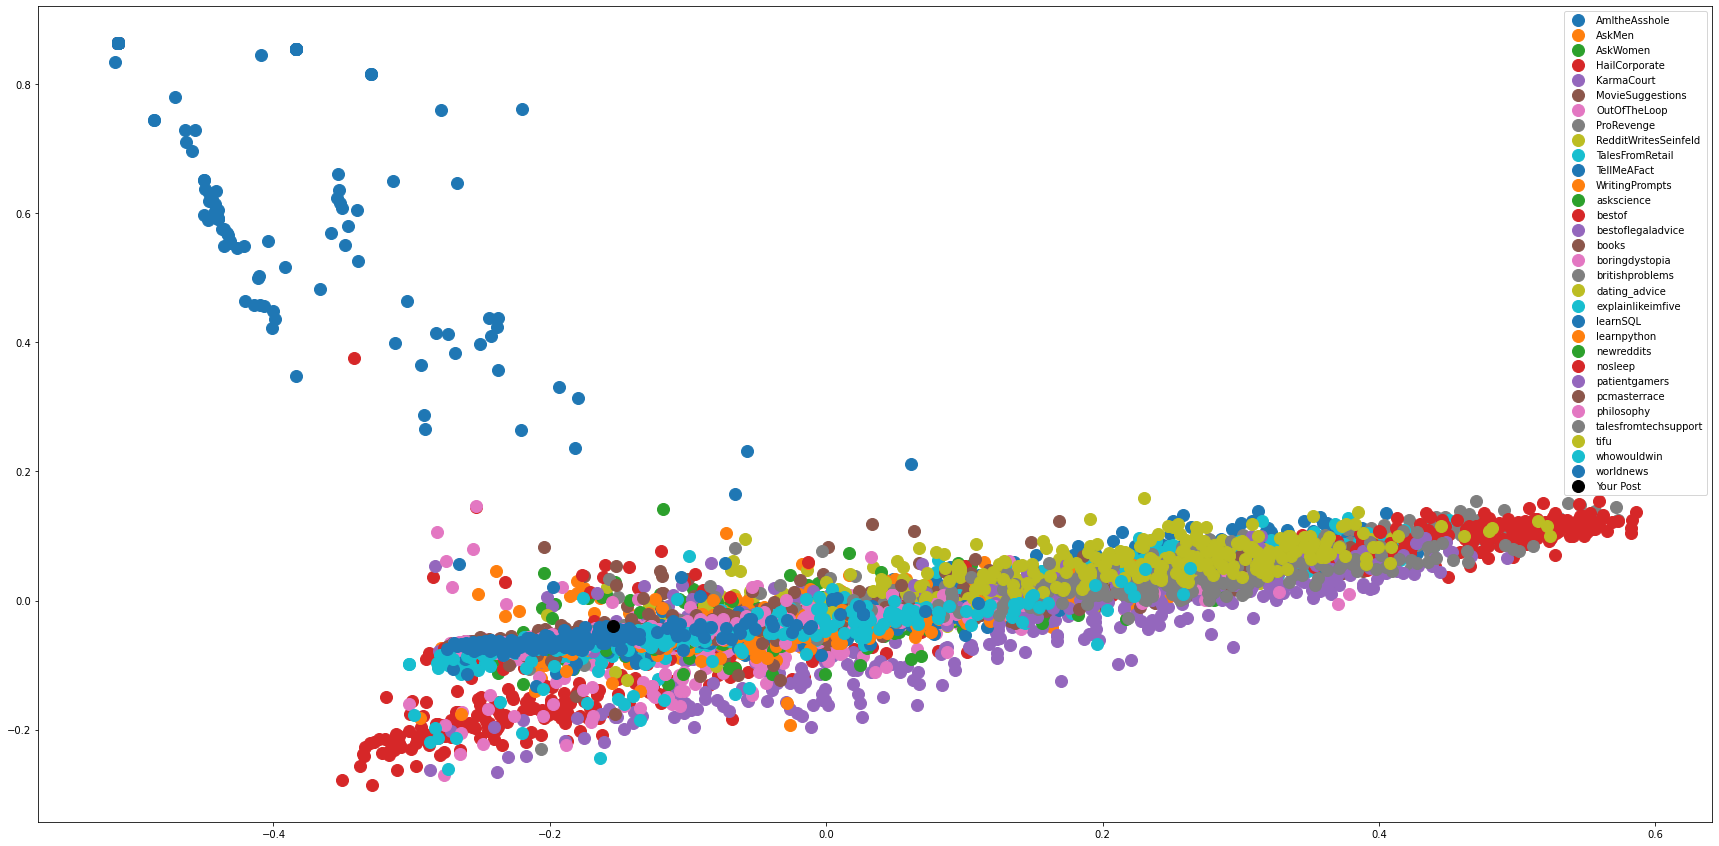

In [120]:
groups = plot_df.groupby('subreddit')

# Plot
fig, ax = plt.subplots()

fig.set_size_inches(30, 15)
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group[0], group[1], marker='o', linestyle='', ms=12, label=name)

x = decom.transform(vect.transform(["Am i the asshole"]).todense())[0]
ax.plot(x[0],x[1],marker="o", linestyle="", ms=12, label="Your Post", c="black")

ax.legend()

plt.show()


In [116]:
train_df.shape

(5852, 1720)